In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("results.csv")
df

,Company,High,Hour,Datetime
0,BYND,37.804901,9,2022/05/02 09:55:00
1,BYND,37.990002,10,2022/05/02 10:30:00
2,BYND,37.590000,11,2022/05/02 11:30:00
3,BYND,37.330002,12,2022/05/02 12:20:00
4,BYND,36.570000,13,2022/05/02 13:05:00
...,...,...,...,...
68,TTD,60.979900,12,2022/05/02 12:20:00
69,TTD,59.939999,13,2022/05/02 13:00:00
70,TTD,59.939999,13,2022/05/02 13:10:00
71,TTD,60.279999,14,2022/05/02 14:50:00


# Question1: Highest Stock Price at the First Trading Hour (A Bar Chart: Each bar refers to a company)

In [3]:
df_q1 = df[df["Hour"]==9]
df_q1

,Company,High,Hour,Datetime
0,BYND,37.804901,9,2022/05/02 09:55:00
7,DDOG,123.339996,9,2022/05/02 09:55:00
14,FB,210.729996,9,2022/05/02 09:55:00
21,NFLX,198.600006,9,2022/05/02 09:55:00
28,OKTA,123.349998,9,2022/05/02 09:55:00
35,PINS,21.240000,9,2022/05/02 09:55:00
43,SHOP,451.000000,9,2022/05/02 09:40:00
50,SNAP,29.540001,9,2022/05/02 09:50:00
58,SQ,103.069901,9,2022/05/02 09:55:00
65,TTD,61.224998,9,2022/05/02 09:55:00


<AxesSubplot:title={'center':'Highest Stock Price at the First Trading Hour'}, xlabel='Company', ylabel='Stock Price'>

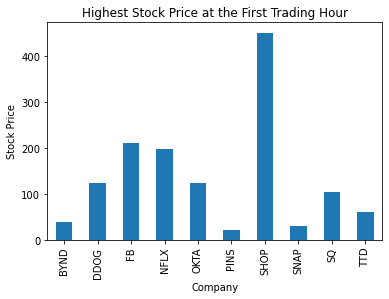

In [4]:
df_q1.plot.bar(x="Company", y = "High", ylabel = "Stock Price", legend = False, 
               title="Highest Stock Price at the First Trading Hour")

# Question2: Highest Hourly Stock Price Trend (A Line Chart: Each line refers to a company)

Text(0.5, 1.0, 'Highest Hourly Stock Price Trend')

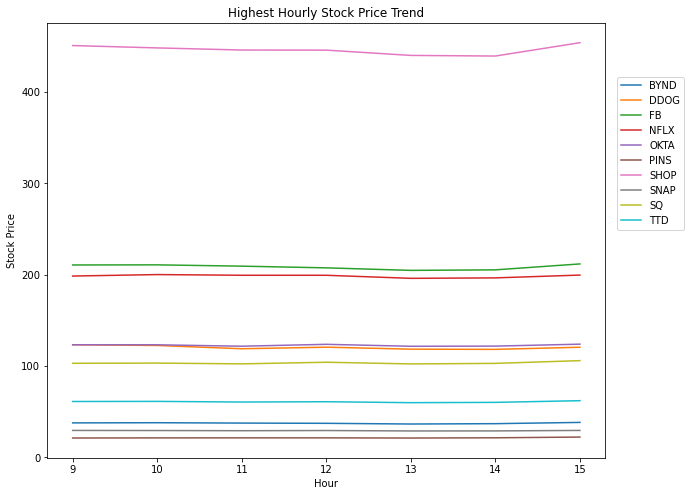

In [5]:
plt.figure(figsize=(10,8))
g = sns.lineplot(data = df, x="Hour", y="High", hue="Company")
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.7), ncol=1)
plt.ylabel("Stock Price")
plt.title("Highest Hourly Stock Price Trend")

# Question3: Comparison of Opening and Closing Price (A Grouped Bar Chart: Each group refers to a company and the bars refer to the opening and closing prices)

In [6]:
data=[]
for row in range(len(df)):
    if df["Hour"][row]==9:
        data.append([df["Company"][row], df["High"][row], df["Hour"][row]])
        
    if df["Hour"][row]==15:
        data.append([df["Company"][row], df["High"][row], df["Hour"][row]])

data = pd.DataFrame(data, columns=["Company","High", "Hour"])
data["Hour"] = data["Hour"].replace({9:"openning", 15:"closing"})
data

,Company,High,Hour
0,BYND,37.804901,openning
1,BYND,38.330002,closing
2,DDOG,123.339996,openning
3,DDOG,120.650002,closing
4,FB,210.729996,openning
5,FB,211.880005,closing
6,NFLX,198.600006,openning
7,NFLX,199.660004,closing
8,OKTA,123.349998,openning
9,OKTA,124.004997,closing


Text(0.5, 1.0, 'Opening Stock Price vs Closing Stock Price')

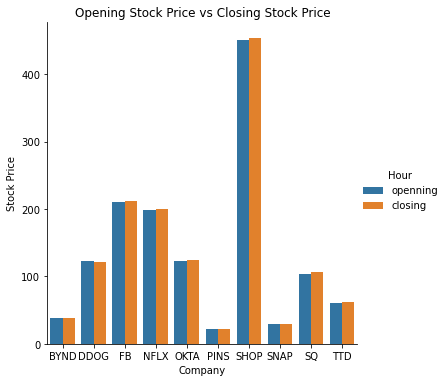

In [7]:
sns.catplot(data=data, kind="bar", x="Company", y="High", hue="Hour")
plt.ylabel("Stock Price")
plt.title("Opening Stock Price vs Closing Stock Price")

# Question4: Average Highest Hourly Stock Price (A Bar Chart: Each bar refers to a company)

In [8]:
#To keep 1 highest price for each hour for each company, delete the duplicate rows
df = df.drop_duplicates(subset=["Company", "High", "Hour"], keep = "first")
df.reset_index(drop=True)

,Company,High,Hour,Datetime
0,BYND,37.804901,9,2022/05/02 09:55:00
1,BYND,37.990002,10,2022/05/02 10:30:00
2,BYND,37.590000,11,2022/05/02 11:30:00
3,BYND,37.330002,12,2022/05/02 12:20:00
4,BYND,36.570000,13,2022/05/02 13:05:00
...,...,...,...,...
65,TTD,60.639999,11,2022/05/02 11:30:00
66,TTD,60.979900,12,2022/05/02 12:20:00
67,TTD,59.939999,13,2022/05/02 13:00:00
68,TTD,60.279999,14,2022/05/02 14:50:00


In [9]:
avg_df = df[["Company", "High"]].groupby('Company').mean()
avg_df.reset_index(inplace = True)
avg_df

,Company,High
0,BYND,37.509272
1,DDOG,120.444085
2,FB,208.667143
3,NFLX,198.579099
4,OKTA,122.836442
5,PINS,21.485714
6,SHOP,446.482130
7,SNAP,29.311429
8,SQ,103.474815
9,TTD,60.933556


<AxesSubplot:title={'center':'Average Highest Hourly Stock Price'}, xlabel='Company', ylabel='Stock Price'>

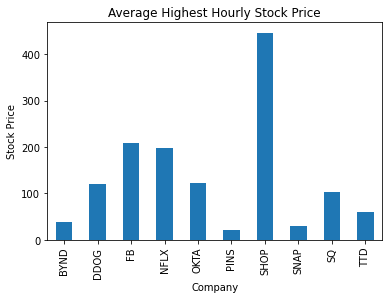

In [10]:
avg_df.plot.bar(x="Company", y="High", ylabel="Stock Price", legend = False, 
                title="Average Highest Hourly Stock Price")